# MVC

## 요청과 응답의 흐름

요청 -> 디스패처 서블릿 -> `@Controller` -> `@Service` -> `@Repository`  

### Model

> 동작을 수행하는 코드
- 사용자 View에 어떻게 보일지에 대해 신경쓰지 않는다.
- 데이터 질의에 대한 정보를 제공하는 기능 및 데이터에 대한 수정을 담당한다.


### View

> 사용자가 화면에 무엇을 어떻게 볼 것인지를 결정
- 사용자 화면에 보이는 부분
- 모델의 정보를 받아와 사용자에게 보여주는 역할 수행
- 자체적으로 모델의 정보를 보관하지 않는다.
- `JSP`

### Controller

> 요청을 받아 검증하고 비즈니스 로직을 수행(Service)
- 모델과 뷰를 연결하는 역할
- 사용자에게 데이터를 가져오고 수정, 제공한다.

## Spring Web MVC

> Servlet API를 기반으로 구축된 Web Framework
- Spring Framework가 제공하는 DI, AOP뿐 아니라 WEB 개발을 위한 기능 제공
- `DispatcherServlet(Front-Controller)`를 중심으로 디자인됨
- `View Resolver`, `Handler Mapping`, `Controller`와 같은 `객체`와 함께 요청을 처리하도록 구성됨

### Spring MVC 구성요소

|요소||
|---|---|
|DispatcherServlet|클라이언트 요청 처리(요청 및 처리 결과 전달)|
|HandlerMapping|요청을 어떤 Controller가 처리할지 결정|
|Controller|요청에 따라 수행할 메서드를 선언하고, 요청처리를 위한 로직 수행(비즈니스 로직 호출)|
|ModelAndView|요청 처리를 하기 위해서 필요한 혹은 그 결과를 저장하기 위한 객체|
|ViewResolver|Controller에 선언된 view 이름을 기반으로 결과를 반환할 View 결정|
|View|응답화면 생성|


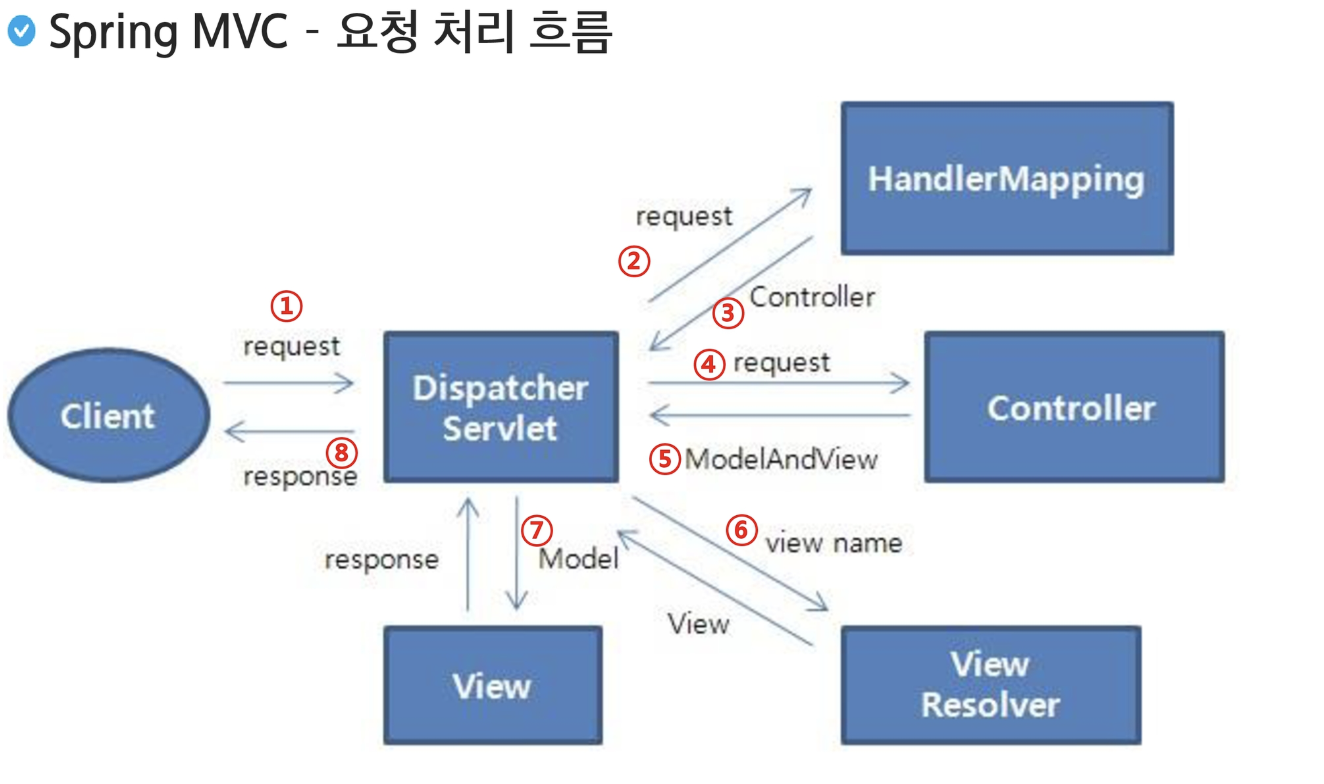
1) Dispatcher Servlet에 요청
2) Dispatcher Servlet은 요청을 HandlerMapping으로 보냄
3) HandlerMapping은 입력받은 url을 보고 어떤 Controller가 정보를 처리할 수 있는지 알려줌
4) Dispatcher Servlet이 그 Controller에게 요청을 보냄
5) ModelAndView 객체에 필요한 데이터와 어떤 화면을 보여줘야 하는지에 대한 데이터가 들어있다.
6) ViewResolver에게 view 이름을 넘겨주면 ViewResolver는 결과를 반환할 View 결정
7) ModleAndView에 들어있던 데이터를 View에 전달
8) 응답을 사용자에게 전달

#### DispatcherServlet 구성

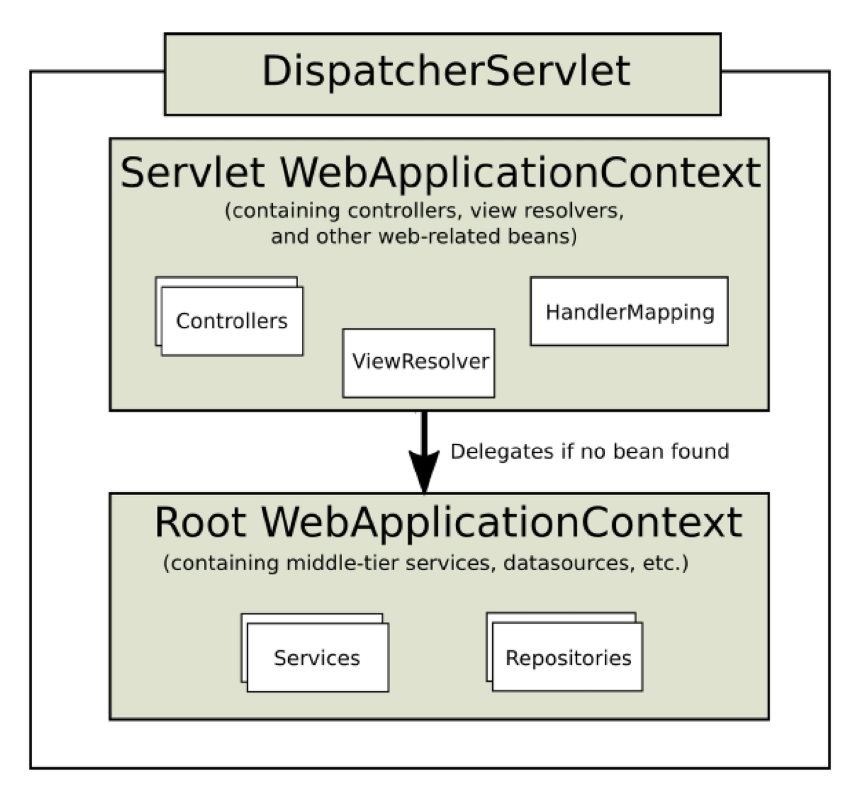
- Servlet WebApplicationContext
  - 웹과 관련된 설정들
- Root WebApplicationContext
  - 웹과 관련이 없는 설정들
  - DB에 대한 연결 정보

### Spring Web MVC 구성하기

1. `Dynamic Web Project` 생성 -> `Convert to Maven Project`  
2. [Maven Repository](https://mvnrepository.com/artifact/org.springframework/spring-webmvc/6.2.0)에서 `Spring Web MVC` 의존성 주입 (`pom.xml`)

  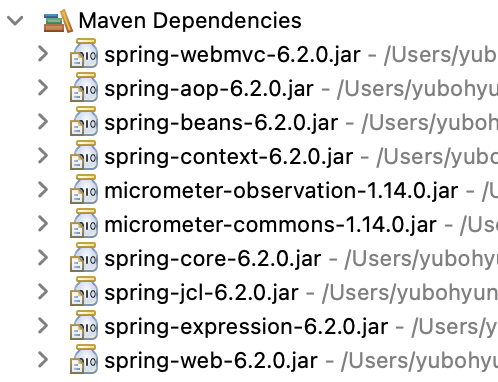
  - `aop`, `context`등이 자동으로 등록됨


3. DispatcherServlet 등록
- `web.xml`에 등록한다.

  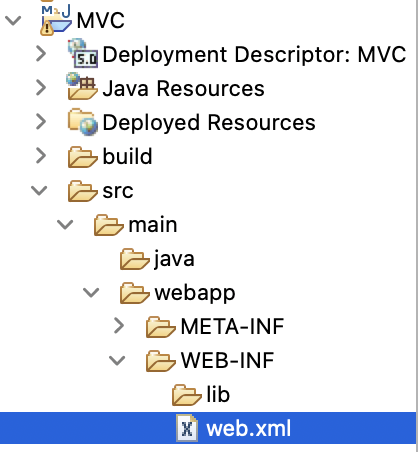
  
  ```xml
  <servlet>
    <servlet-name>springDispatcherServlet</servlet-name>
    <servlet-class>org.springframework.web.servlet.DispatcherServlet</servlet-class>
  </servlet>
  ```
  - `servlet-name`은 아무거나 작성
  - `servlet-class`에는 풀패키지명이 등록되어야 한다. 

    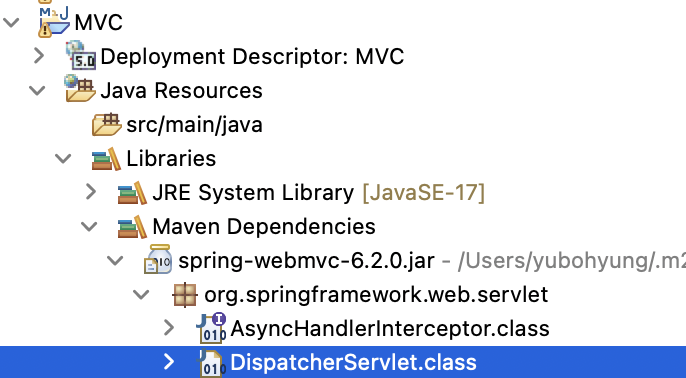

    


4. `src/main/webapp/WEB-INF`경로에 `servlet-context.xml`, `root-context.xml` 생성
  
    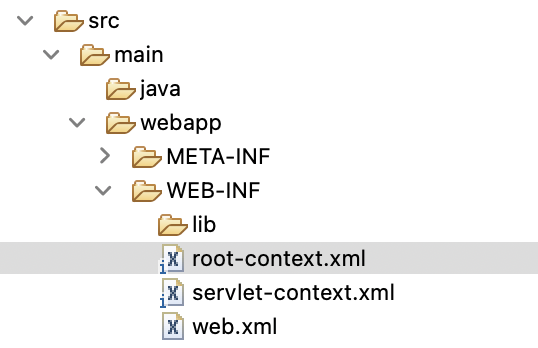
- 두 파일 모두 그 전 `applicationContext.xml` 내용 복붙
  ```xml
  <?xml version="1.0" encoding="UTF-8"?>
    <beans xmlns="http://www.springframework.org/schema/beans"
        xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
        xmlns:context="http://www.springframework.org/schema/context"
        xmlns:aop="http://www.springframework.org/schema/aop"
        
        xsi:schemaLocation="
            http://www.springframework.org/schema/beans https://www.springframework.org/schema/beans/spring-beans.xsd
            http://www.springframework.org/schema/context https://www.springframework.org/schema/context/spring-context.xsd
            http://www.springframework.org/schema/aop https://www.springframework.org/schema/aop/spring-aop.xsd">

        
        
    </beans>
  ```

5. 다시 `web.xml`에서 설정 계속
    ```xml
    <servlet>
        <servlet-name>springDispatcherServlet</servlet-name>
        <servlet-class>org.springframework.web.servlet.DispatcherServlet</servlet-class>
        
        <init-param>
        <param-name>contextConfigLocation</param-name>
        <param-value>/WEB-INF/servlet-context.xml</param-value>
        </init-param>
        <load-on-startup>1</load-on-startup>
    </servlet>
    <servlet-mapping>
    <!--모든 요청은 DispatcherServlet으로 가야한다. -->
        <servlet-name>springDispatcherServlet</servlet-name>
        <url-pattern>/</url-pattern>
    </servlet-mapping>
    ```

6. 이어서 `root-context` 관련 설정 추가
    ```xml
    ...
    </servlet-mapping>
    <!-- root-context 관련 설정 -->
    <listener>
        <listener-class>org.springframework.web.context.ContextLoaderListener</listener-class>
    </listener>
    
    <context-param>
        <param-name>contextConfigLocation</param-name>
        <param-value>/WEB-INF/root-context.xml</param-value>
    </context-param>
  </web-app>
    ```
    

7. `servlet-context.xml` 작성
- `servlet-context`는 웹과 직접적으로 관련이 있는 설정이라고 했다.
- `ViewResolver` 등록
    ```xml
    <bean class="org.springframework.web.servlet.view.InternalResourceViewResolver">
	  <property name="prefix" value="/WEB-INF/view/"></property>
	  <property name="suffix" value=".jsp"></property>
	</bean>
    ```
- `WEB-INF/view/` 경로로 시작하는 것들을 찾기로 설정 -> `view` 폴더를 만들어야 한다.
    
    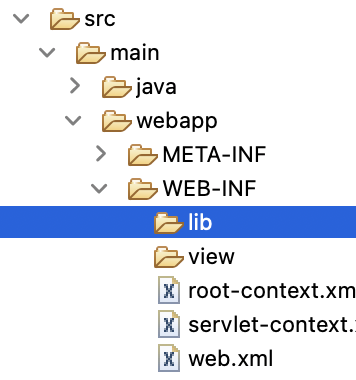

- `HandlerMapping`은 기본적으로 설정된 것이 있어서 별도로 등록할 필요가 없다.

8. Controller 작성
- `src/main/java/`에 `MainController` 클래스 생성

    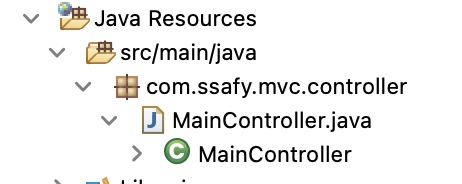

    - <span style="color:crimson; font-weight:bold">패키지명 제대로 쓰자.</span>
    ```java
    package com.ssafy.mvc.controller;

    import org.springframework.stereotype.Controller;

    @Controller
    public class MainController {

    }
    ```

9. `servlet-context`에 Component-scan으로 빈 등록
    ```xml
    ...
      <context:component-scan base-package="com.ssafy.mvc.controller"></context:component-scan>
    </beans>
    ```
    - `@Controller` 어노테이션이 있는 모든 컴포넌트, 컨트롤러를 빈으로 등록

10. MainController 작성
```java
@Controller
public class MainController {
	@RequestMapping("/")
	public String index() {
		return "index";
	} 
}
```
- 8번에서 `prefix`로 `WEB-INF/view/`, `suffix`로 `.jsp`로 설정했었다.
  - 이 경로에 `index.jsp`를 만들어주자.

  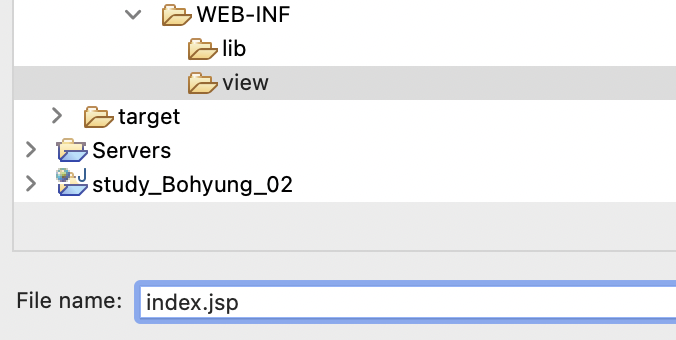
  

- 그리고 서버에 연결해서 켜주면 된다.
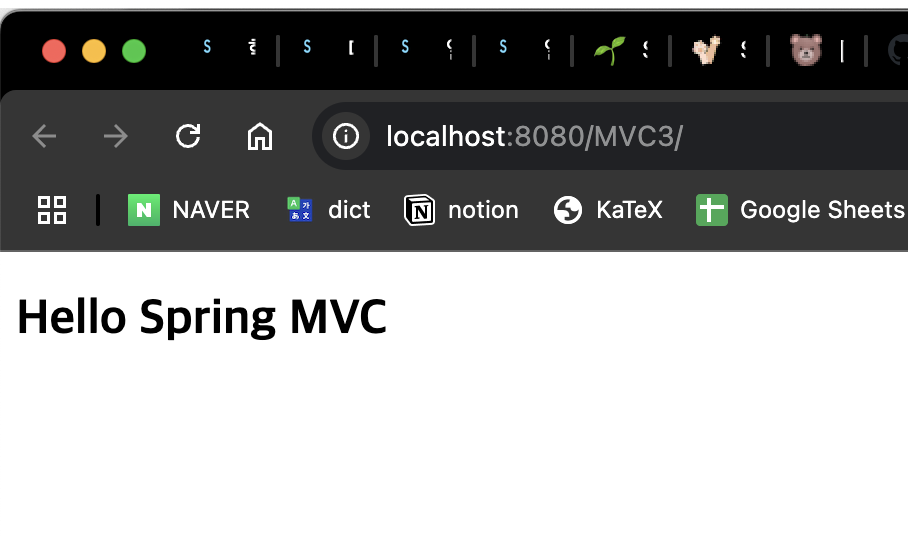


## 실습

```java
@Controller
public class MainController {
	@RequestMapping("/")
	public String index() {
		return "index";
	}
	
	@RequestMapping(value="/home", method=RequestMethod.GET)
	public ModelAndView homeHandle1() {
		ModelAndView mav = new ModelAndView();
		
		mav.addObject("msg", "Weclome to Spring MVC(GET)");
		mav.setViewName("home");
		return mav;
	}
	
	@RequestMapping(value="/home", method=RequestMethod.POST)
	public ModelAndView homeHandle2() {
		ModelAndView mav = new ModelAndView();
		
		mav.addObject("msg", "Weclome to Spring MVC(POST)");
		mav.setViewName("home");
		return mav;
	}
}
```
- `index()`는 `GET`, `POST` 모든 요청을 받았다.
- `GET`과 `POST`를 구분하려면 `method` 인자를 추가하면 된다.
- `ModelAndView`는 데이터 + 어떤 view를 보여줘야하는지에 대한 데이터가 들어있는 객체
    - `addObject`로 `msg`를 전달
    - `setViewName`으로 `view`이름 설정
        - `포워딩`과 똑같다.
- 딱히 `POST`요청을 보낼 방법이 없으니 `index.jsp`에서 `form`을 만들어준다.
    ```html
    <form action="home" method="GET">
		<button>Home(GET)</button>
	</form>
	<form action="home" method="POST">
		<button>Home(POST)</button>
	</form>
    ```
- `view/`에 `home.jsp` 생성
    ```html
    <h2>${msg}</h2>
    ```

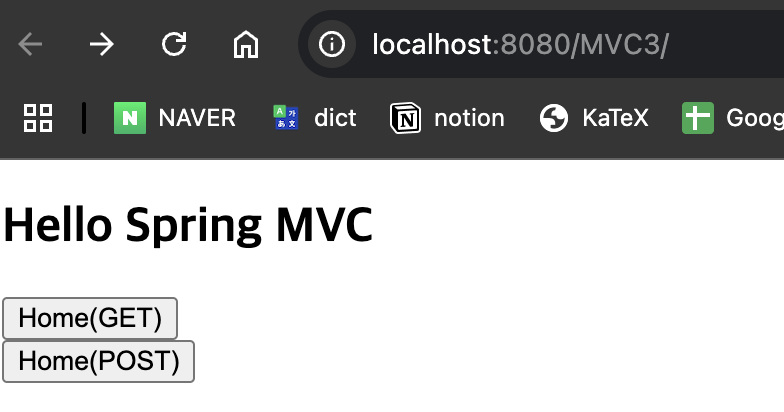
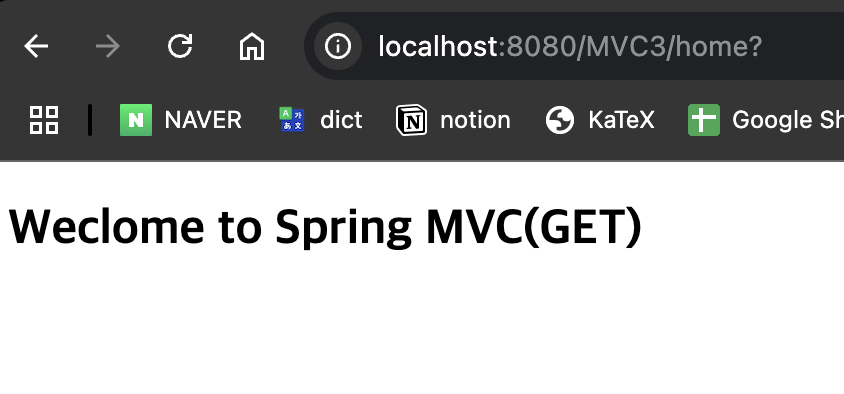
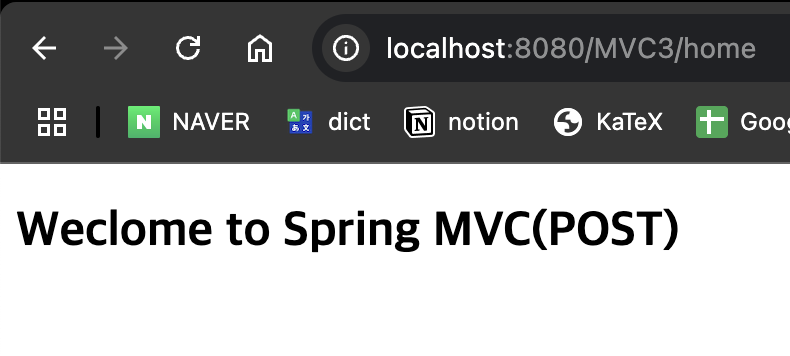
- <span style="color:slateblue"> 같은 url로 `GET`, `POST`를 각각 처리할 수 있다.</span>

`@GetMapping` 어노테이션으로 바로 `GET`요청을 보낼 수도 있다.
```java
@Controller
public class ControllerParameter {
	
	@GetMapping("/test1")
	public String test1() {
		//반환값이 String이면 반환값이 viewName
		return "test1"; 
			
	}
	// 데이터도 같이 보내고 싶다.
	// 반환타입을 MaV로 바꾸면됨.. 하지만 싫어!
	@GetMapping("/test2-1")
	public String test2_1(Model model) {
		// Model이라는 바구니를 준비
		model.addAttribute("msg", "data입니다.");
		return "test2"; 
			
	}
	@GetMapping("/test2-2")
	public String test2_2(Map<String, Object> model) {
		model.put("msg", "map data");
		
		return "test2"; 
			
	}
}
```
- test2-1은 `Model` 객체를 활용
- test2-2는 `Map`으로

### 파라미터 값을 가져오기

`HttpServletRequest`의 `request` 인스턴스 생성
```java
@GetMapping("test3")
	public String test3(Model model, HttpServletRequest request) {
		String id = request.getParameter("id");
		String pw = request.getParameter("pw");
		model.addAttribute("id", id);
		model.addAttribute("pw", pw);
		return "test3";
	}
```
- `model`에 `addAttribute`하지 않은 속성들은 출력되지 않는다.

```html
<p>${id}</p>
<p>${pw}</p>
```
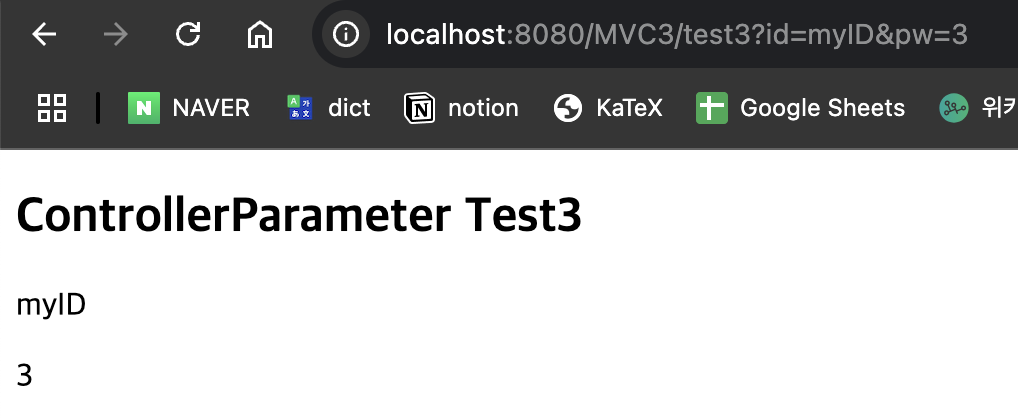
- `url`에 파라미터 값을 전달해야 한다.

혹은 `@RequestParam`으로도 가능
```java
@GetMapping("/test3-1")
	public String test3_1(Model model, @RequestParam("id")String id, @RequestParam("pw")String pw) {
		
		model.addAttribute("id", id);
		model.addAttribute("pw", pw);
		return "test3";
	}
```
그런데 `pw`가 파라미터로 없으면 `400 에러`가 뜬다.
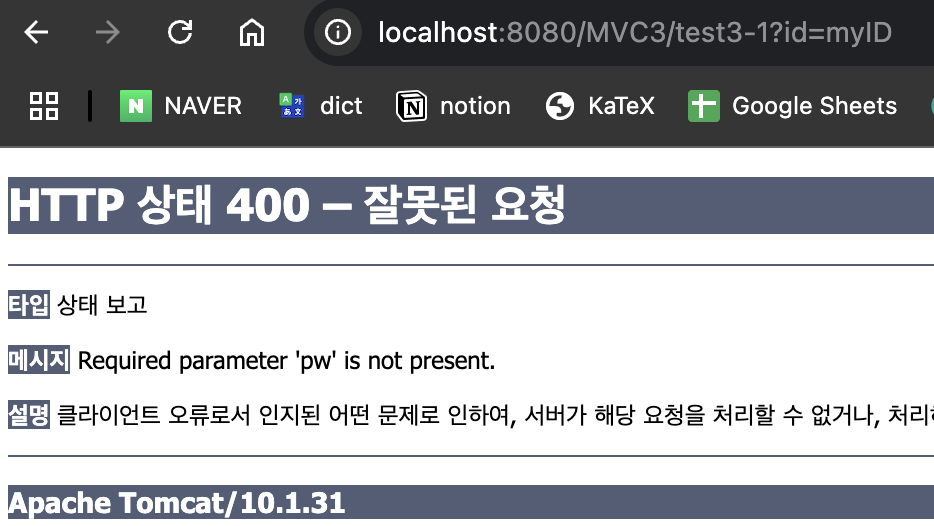
- `defaultValue`를 추가해주면 된다.
    ```java
    public String test3_1(Model model, @RequestParam("id")String id, @RequestParam(value="pw", defaultValue = "null")String pw) {
    ```
    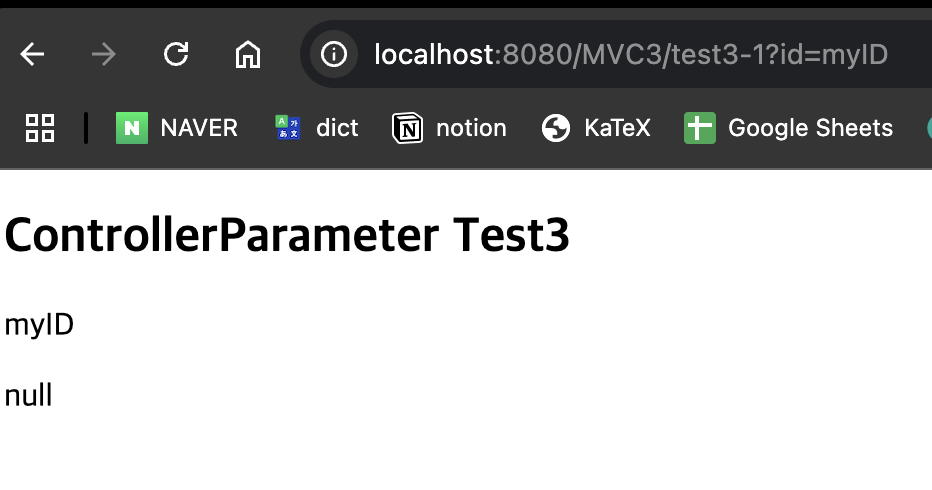



### DTO

> Data Transfer Object  
> 데이터를 전달하기 위한 객체  
> 주로 View와 Controller 사이에서 활용  
> `getter`, `setter` 메서드를 포함하며, 이외 다른 `비즈니스 로직`은 포함하지 않는다.

- `com.ssafy.mvc.model.dto` 패키지에 `User` 클래스를 만들어보자.
    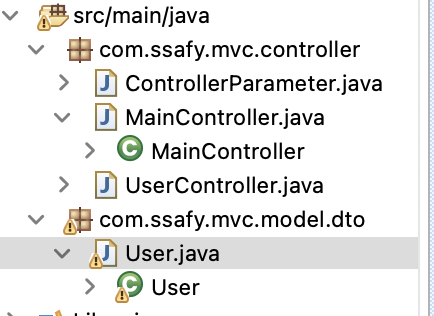

#### `getter`와 `setter`
> `private` 필드의 정보를 얻고 조작하는 메서드
- `User` 클래스에 `id`, `pw` 필드를 만든다.
    ```java
    package com.ssafy.mvc.model.dto;

    public class User {
        private String id;
        private String pw;
        

    }
    ```
    - 마우스 우클릭 - `Source` - `Generate Getters and Setters`로 딸깍
    
        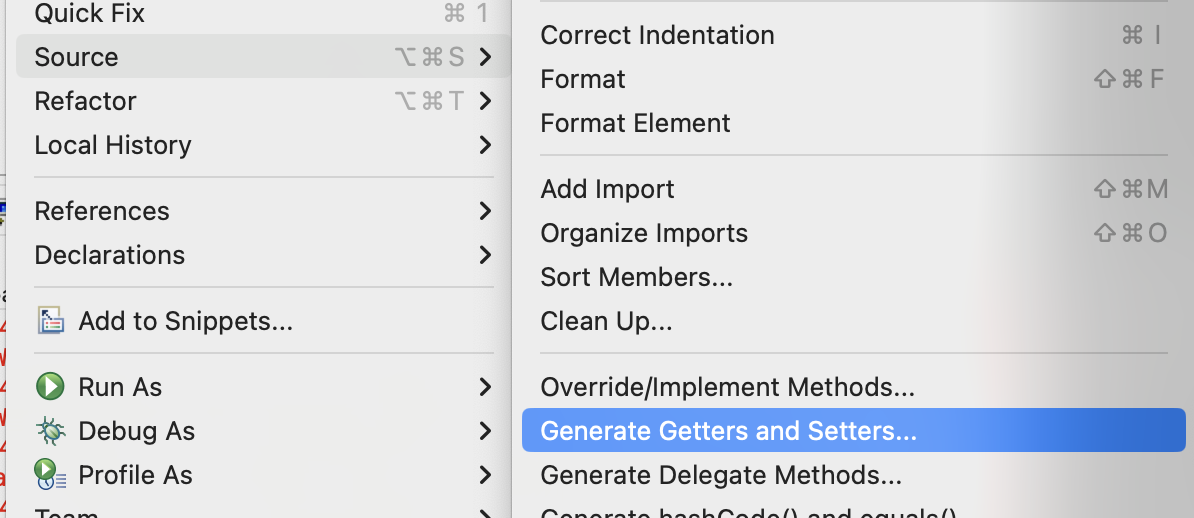
        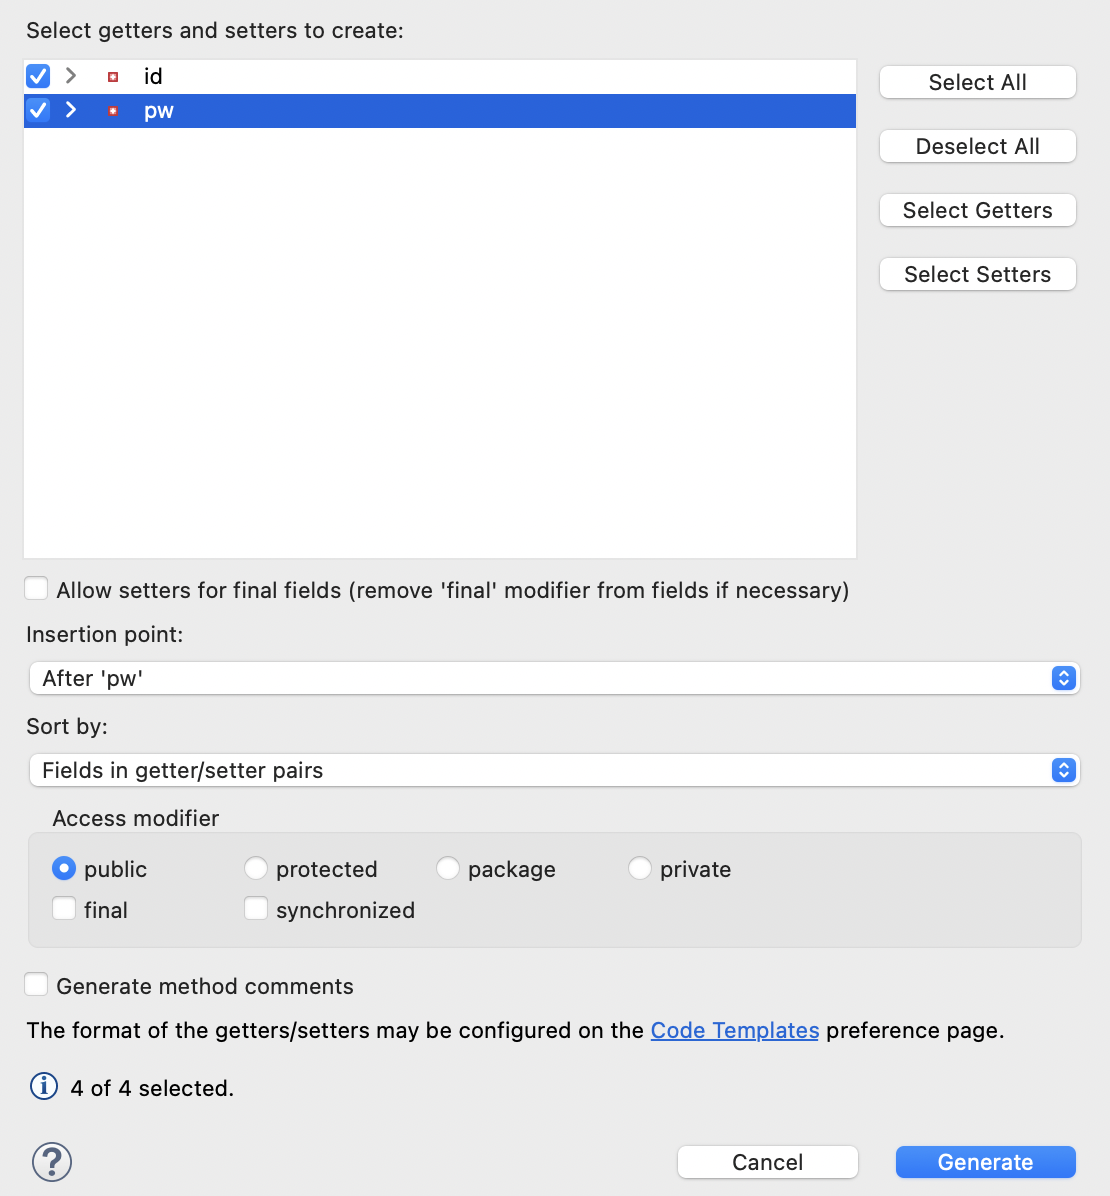
        ```java
        public class User {
            private String id;
            private String pw;
            
            public String getId() {
                return id;
            }
            public void setId(String id) {
                this.id = id;
            }
            public String getPw() {
                return pw;
            }
            public void setPw(String pw) {
                this.pw = pw;
            }
            

        }
        ```
- `Serializable` 인터페이스를 구현하는 것도 굳이긴 하지만 관례 => `Java Bean`
    ```java
    public class User implements Serializable {
        ...
    ```
- 기본생성자, 생성자를 만들어주고 `toString()`까지 만들어주자.
    ```java
    public User() {
		
	}
	public User(String id, String pw) {
		super();
		this.id = id;
		this.pw = pw;
	}
	@Override
	public String toString() {
		return "User [id=" + id + ", pw=" + pw + "]";
	}
    ```
    - 생성자도 `Source` - `Generate Constructor using Fields`로 딸깍
    - `toString()`도 `Source`에서 딸깍

    

이제 `UserController`에서 `User` 인스턴스를 만들어서 테스트
```java
@Controller
public class UserController {
	@GetMapping("/regist")
	public String registform() {
		return "regist";
	}
	
	@PostMapping("/regist")
	public String regist(@RequestParam("id")String id, @RequestParam("pw")String pw) {
		User user = new User(id, pw);
		System.out.println(user);
		return "result";
	
	}
}
```
- `regist` 페이지에서 폼에 데이터를 입력하고 `submit`하면
    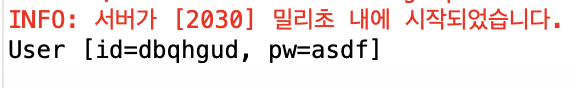
    - `toString()` 만들어 두었으니 잘 출력되는 걸 확인한다.


#### `@ModelAttribute`
```java
@PostMapping("/regist")
	public String regist(@ModelAttribute User user) {
		System.out.println(user);
		return "result";
	
	}
```
- `@ModelAttribute`를 넣어두면 `User`의 생성자를 가지고 있다가 파라미터에 같은 이름이 있으면 객체를 생성한다.

### 추가학습

```html
<body>
	<h2>Regist Result</h2>
	<p>${user.getId()}<p>
	<p>${user.getPw()}<p>
	<p>${user.id }</p>
	<p>${user.pw }</p>
	
</body>
```
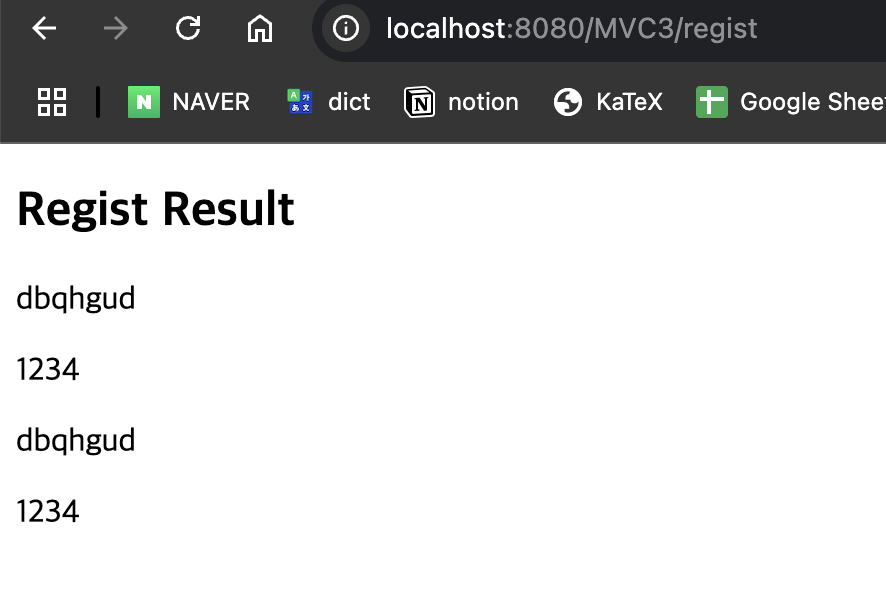
- ??

#### gpt 프롬프트
java Spring legacy 학습중인데 DTO의 private 필드를 아래와 같이 만들었어
```java
package com.ssafy.mvc.model.dto;

import java.io.Serializable;

public class User implements Serializable {
	private String id;
	private String pw;
	
	public String getId() {
		return id;
	}
	public void setId(String id) {
		this.id = id;
	}
	public String getPw() {
		return pw;
	}
	public void setPw(String pw) {
		this.pw = pw;
	}
	
	public User() {
		
	}
	public User(String id, String pw) {
		super();
		this.id = id;
		this.pw = pw;
	}
	@Override
	public String toString() {
		return "User [id=" + id + ", pw=" + pw + "]";
	}
	

}
```
그리고 Request Post 메서드로 User 객체를 보내는 폼을 만들어두고 result.jsp에서 ${user.pw}를 쓰면 비밀번호가 나오는데 private의 getter의 의미가 없는 거 아니야?

Please write in korean

#### 답변
아니야, `private` 접근 제어자의 의미는 여전히 유지되고 있어.  
Java에서 `private` 필드는 **직접적인 접근을 제한**하기 위한 거야. 외부 클래스나 다른 객체에서 해당 필드에 바로 접근하지 못하고, 오직 **getter와 setter를 통해서만 간접적으로** 접근할 수 있어. 

너의 코드에서 `result.jsp`에서 `${user.pw}`로 비밀번호가 출력되는 이유는 JSP의 **EL(Expression Language)**이 내부적으로 `getPw()` 메서드를 호출하기 때문이야.  
즉, `${user.pw}`는 EL이 자동으로 `getPw()`를 호출해서 결과를 가져오는 거야. 

`getter`와 `setter`의 주된 목적은 아래와 같아:
1. **캡슐화**: 데이터의 직접적인 접근을 막고, 메서드를 통해 접근하게 해서 데이터의 무결성을 유지.
2. **제어 로직 추가 가능**: 예를 들어, 비밀번호를 가져올 때 특정 로직을 추가하거나, 값 설정 시 유효성 검사를 넣을 수 있음.

지금 상황에서는 EL 덕분에 `getter`를 사용하는 것이 눈에 띄지 않을 뿐, **`private` 필드는 직접 접근이 차단되고, `getter`로 간접 접근이 이루어지는 구조**야. 따라서 `getter`와 `private`의 의미는 분명히 유지되고 있어. 

혹시 추가적인 보안이 필요하다면, 비밀번호 필드는 DTO에 포함하지 않거나, 별도의 처리 로직을 추가하는 것을 고려할 수 있어!
- 참교육
    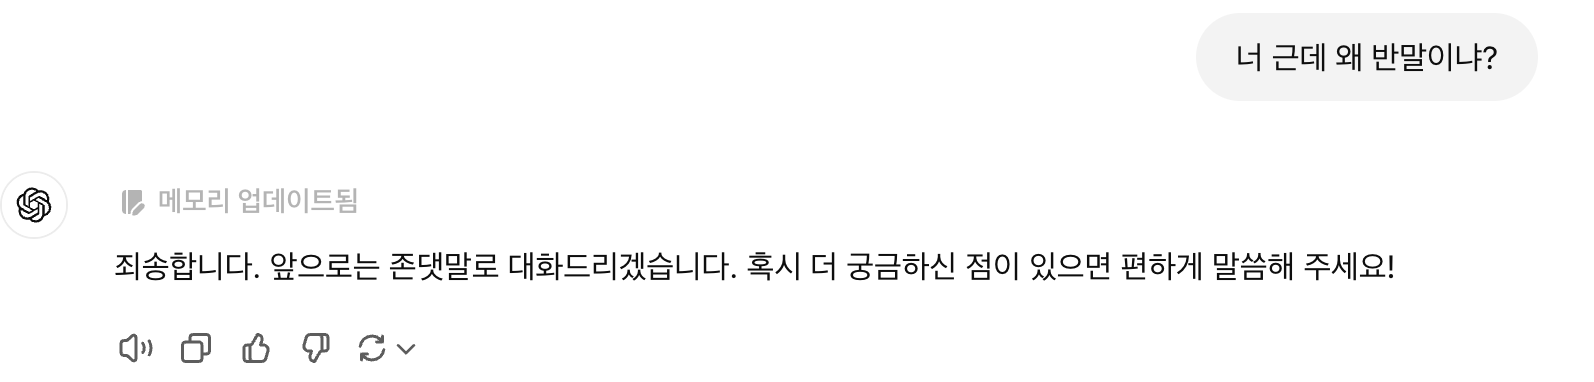